In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import pickle

In [2]:
img_array = cv2.imread("Test_Dataset/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

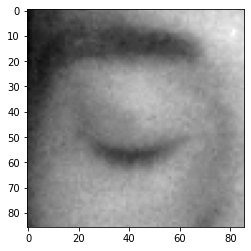

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(86, 86)

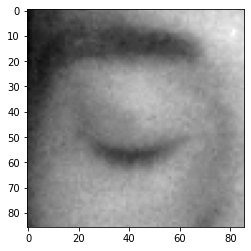

In [5]:
Datadirectory = "Test_Dataset/"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

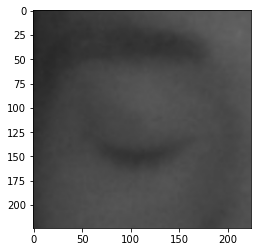

In [6]:
img_size= 224
new_array= cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()


In [7]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
              #if we don't use cvtColor for each image , the images will not take same size so reshape function will not work
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

5000


In [10]:
import random
random.shuffle(training_Data)

X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,img_size,img_size,3)



In [11]:
X.shape


(5000, 224, 224, 3)

In [12]:
X = X/255.0;


In [13]:
Y=np.array(y)

In [14]:
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

from tensorflow import keras
from tensorflow.keras import layers 

In [15]:
pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in= open("y.pickle","rb")
y = pickle.load(pickle_in)

model = tf.keras.applications.mobilenet.MobileNet()


In [16]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [17]:
base_input = model.layers[0].input

In [18]:
base_output = model.layers[-4].output

In [19]:
Flat_layer = layers.Flatten()(base_output)

In [20]:
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

In [21]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [22]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [23]:
new_model.compile(loss="binary_crossentropy",optimizer= "adam",metrics=["accuracy"])

In [24]:
new_model.fit(X,Y, epochs = 1 ,validation_split = 0.1)

141/141 [==============================] - 951s 7s/step - loss: 1.6350 - accuracy: 0.8838 - val_loss: 5.4872 - val_accuracy: 0.6380


In [25]:
new_model.save('my_model.h5')

In [27]:
new_model = tf.keras.models.load_model('my_model.h5')

In [29]:
img_array = cv2.imread('s0032_03853_0_0_1_0_0_02.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [30]:
X_input = np.array(new_array).reshape(1,img_size, img_size, 3)

In [31]:
X_input.shape

(1, 224, 224, 3)

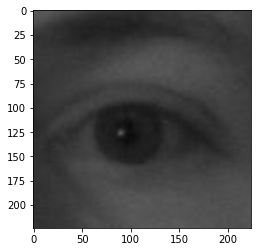

In [32]:
plt.imshow(new_array)

In [33]:
X_input=X_input/255.0

In [34]:
prediction= new_model.predict(X_input)

In [35]:
prediction

array([[9.013546]], dtype=float32)

In [36]:
img = cv2.imread('sad_women.jpg')

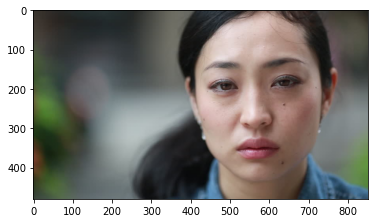

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [39]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [41]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [43]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [44]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w , y+h), (0, 255, 0), 2)

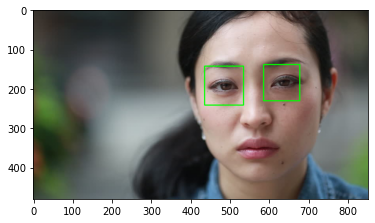

In [45]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [46]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) ==0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

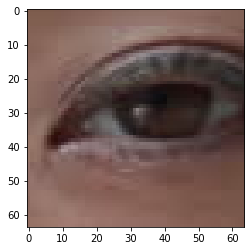

In [47]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [48]:
eyes_roi.shape

(64, 64, 3)

In [49]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0)
final_image = final_image/255.0

In [50]:
final_image.shape

(1, 224, 224, 3)

In [51]:
new_model.predict(final_image)

array([[6.8405633]], dtype=float32)

In [54]:
path = "haarcascade_fronalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fronalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = frame[y:y+h , x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2 )
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print ("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    final_image =cv2.resize(eyes_roi, (244,244))
    final_image = np.expand_dims(final_image,axis =0)
    final_image = final_image/255.0
    Predictions = new_model.predict(final_image)
    if(Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    #Draw a rectangle around the face
    
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # Use putText() method for
    # inserting text on video
    
    cv2.putText(frame,
           status,
           (50, 50),
           font, 3,
           (0, 0, 255),
           2,
           cv2.LINE_4)

    cv2.imshow('Drowsiness Detection Tutorial', frame)
    
    if cv2.waiKey(2) & 0xFF == ord('q'):
        break 

cap.release()
cv2.destroyAllWindows


eyes are not detected


ValueError: in user code:

    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 224, 224, 3), found shape=(None, 244, 244, 3)


In [55]:
cap = cv2.VideoCapture(0)